In [1]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
train_filename = os.path.join(os.getcwd(), 'ds04/assets/Train_knight.csv')
train_df = pd.read_csv(train_filename)
train_df.set_index('knight')
train_df.head(3)

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.1726,0.1449,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.3150,0.5372,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532,Sith


In [4]:
df = train_df.copy()
X = df.drop(columns=['knight'])

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Step 4: Explained variance ratio
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance)

# Step 5: Print results
print("Variances (Percentage):")
print(explained_variance)
print()
print("Cumulative Variances (Percentage):")
print(cumulative_variance)

Variances (Percentage):
[4.42124322e+01 1.83133809e+01 9.86939994e+00 6.44725649e+00
 5.48418978e+00 3.86419671e+00 2.40371418e+00 1.86115266e+00
 1.42841975e+00 1.14635004e+00 1.03990775e+00 9.15659049e-01
 8.25582942e-01 4.49675980e-01 3.24922360e-01 2.80700452e-01
 2.22879421e-01 1.99287079e-01 1.59928087e-01 1.12338278e-01
 1.11953696e-01 8.29193824e-02 7.91693696e-02 5.73407566e-02
 5.14260951e-02 2.68407149e-02 2.06171597e-02 5.70303169e-03
 2.27265764e-03 3.83020159e-04]

Cumulative Variances (Percentage):
[ 44.21243224  62.52581316  72.3952131   78.84246959  84.32665937
  88.19085608  90.59457026  92.45572292  93.88414267  95.03049271
  96.07040047  96.98605952  97.81164246  98.26131844  98.5862408
  98.86694125  99.08982067  99.28910775  99.44903584  99.56137412
  99.67332781  99.75624719  99.83541656  99.89275732  99.94418342
  99.97102413  99.99164129  99.99734432  99.99961698 100.        ]


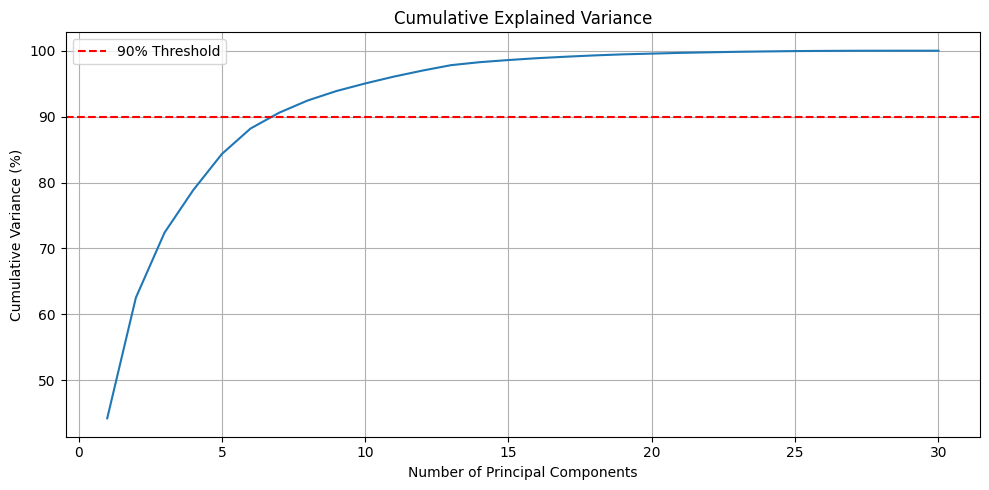

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.axhline(y=90, color='r', linestyle='--', label='90% Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()